# CIFAR-10 Image Classification on Google Colab

**Problem Statement:**  
Train a convolutional neural network to classify color images from CIFAR-10 into 10 categories—no external API keys needed.


In [1]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 2. Load & Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# 3. Define the Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 4. Train the Model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 77ms/step - accuracy: 0.3392 - loss: 1.8023 - val_accuracy: 0.5032 - val_loss: 1.3882
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.5495 - loss: 1.2782 - val_accuracy: 0.5970 - val_loss: 1.1502
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6118 - loss: 1.1006 - val_accuracy: 0.6332 - val_loss: 1.0520
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6529 - loss: 0.9945 - val_accuracy: 0.6566 - val_loss: 1.0060
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6742 - loss: 0.9268 - val_accuracy: 0.6562 - val_loss: 1.0045
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6942 - loss: 0.8758 - val_accuracy: 0.6682 - val_loss: 0.9627
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.7047 - loss: 0.8363 - val_accuracy: 0.6858 - val_loss: 0.9175
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7207 - loss: 0.7925 - 

In [5]:
# 5. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6857 - loss: 1.0481
Test Accuracy: 0.6833


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


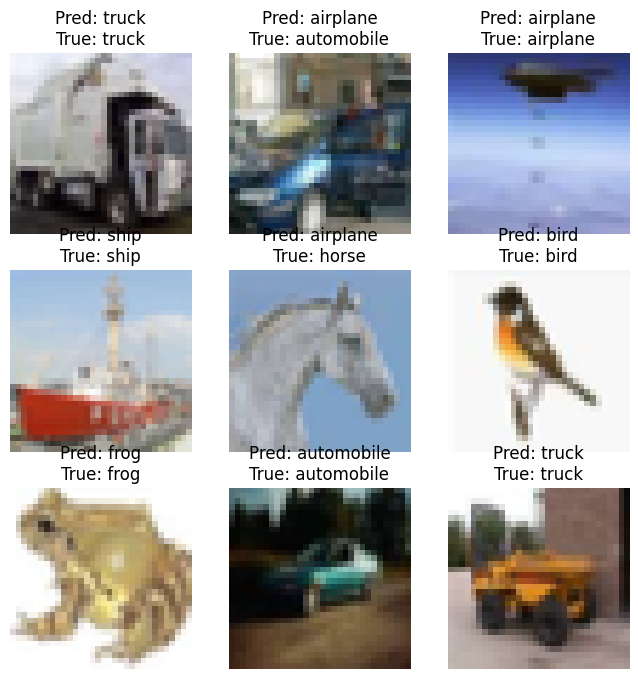

In [6]:
# 6. Visualize Sample Predictions
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,8))
indices = np.random.choice(len(x_test), 9, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx])
    pred = np.argmax(model.predict(x_test[idx:idx+1]))
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()
